# Hands On

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Train Test Making 

In [2]:
x, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5, train_size=60, test_size=140)

In [3]:
print(x_train.shape)
print(y_train.shape)

(60, 30)
(60,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(140, 30)
(140,)


# Ridge Regression (L2 Penalty)

The Ridge estimator is a simple regularization (called L2 penalty) of the ordinary LinearRegression. <br/>
In particular, it has the benefit of being not computationally more expensive than the ordinary least square estimate. <br/><br/>

$$ \text{min}_{w,b} \sum_i || w^\mathsf{T}x_i + b - y_i||^2 + \alpha ||w||_2^2$$

The amount of regularization is set via the `alpha` parameter of the Ridge.

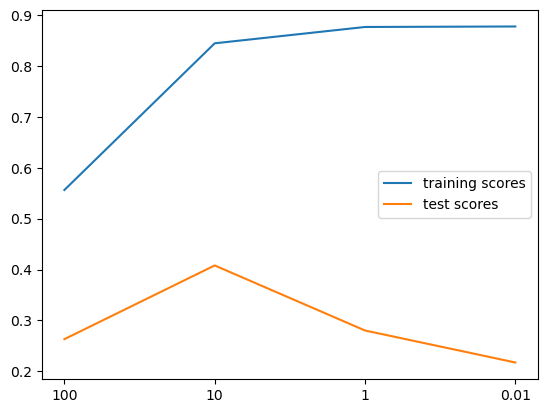

In [9]:
ridge_models = {}
ridge_training_scores = []
ridge_test_scores = []

for alpha in [100, 10, 1, 0.01]:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    ridge_training_scores.append(ridge.score(x_train, y_train))
    ridge_test_scores.append(ridge.score(x_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(ridge_training_scores, label="training scores")
plt.plot(ridge_test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, 0.01])
plt.legend(loc="best")

# Lasso (L1 penalty)

The Lasso estimator is useful to impose sparsity on the coefficient. in another words, it's to be prefered if we believe that many of the features are'nt relevant. This is done via the so-called L1 penalty. <br/> <br/>

$$ \text{min}_{w,b} \sum_i || w^\mathsf{T}x_i + b - y_i||^2 + \alpha ||w||_1$$

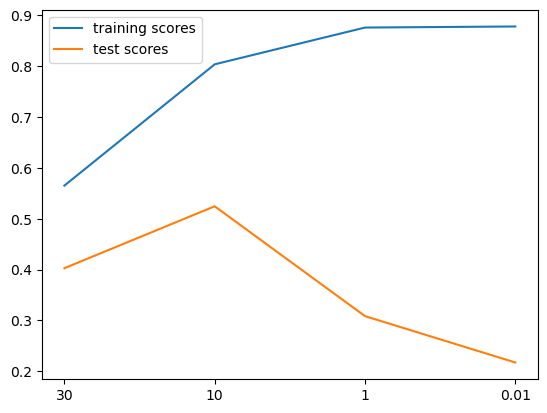

In [10]:
lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, 0.01]:
    lasso = Lasso(alpha=alpha).fit(x_train, y_train)
    training_scores.append(lasso.score(x_train, y_train))
    test_scores.append(lasso.score(x_test, y_test))
    lasso_models[alpha] = lasso

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, 0.01])
plt.legend(loc="best")